<a href="https://colab.research.google.com/github/aasthagarg128/ML_Learn/blob/main/LoanStatusPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

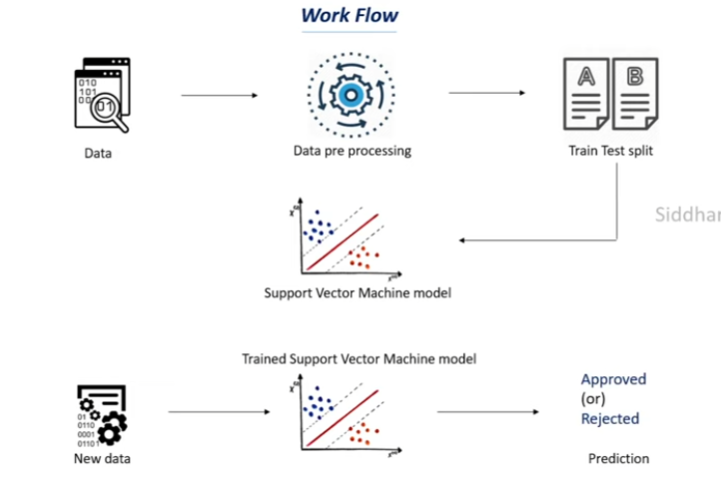

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [ ]:
# loading the dtaset to pandas dataframe
loan_dataset=pd.read_csv('/content/loan_dataset.csv')

In [ ]:
print(loan_dataset)

      Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[614 rows x 13 columns]


In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset.shape

(614, 13)

In [ ]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# dropping the missing values
loan_dataset=loan_dataset.dropna()

In [ ]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# Label Encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
loan_dataset = loan_dataset.infer_objects(copy=False)  # to keep same behavior across versions


In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [ ]:
# replacing the value of 3+ to 4
loan_dataset.replace(to_replace='3+', value=4,inplace=True)
loan_dataset = loan_dataset.infer_objects(copy=False)  # to keep same behavior across versions


Data Visualization

<Axes: xlabel='Education', ylabel='count'>

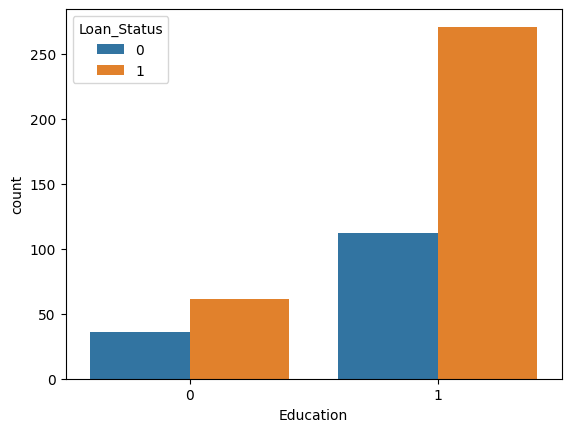

In [ ]:
# eduaction & Loan Status
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

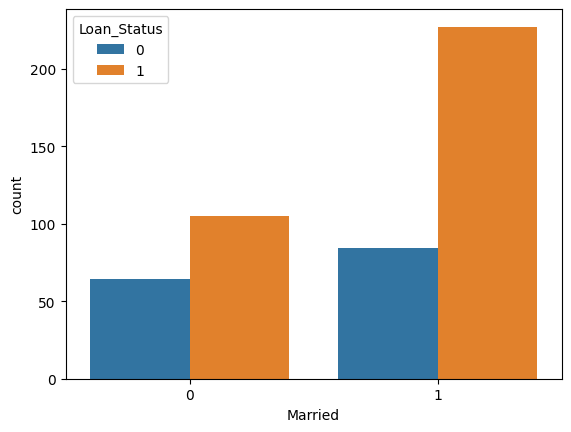

In [ ]:
# marital status and loan status
sns.countplot(x='Married', hue='Loan_Status' , data=loan_dataset)

In [ ]:
# converting categorical column to numerical values
loan_dataset.replace({'Married':{'No':0, 'Yes':1} , 'Gender':{'Male':0 , 'Female':1}, 'Self_Employed':{'No':0, 'Yes':1} , 'Education':{'Not Graduate':0, 'Graduate':1} , 'Property_Area':{'Rural':0, 'Urban':2, 'Semiurban':1}},inplace=True)
loan_dataset = loan_dataset.infer_objects(copy=False)  # to keep same behavior across versions

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# Separating Data and Label
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y=loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  ...  Loan_Amount_Term  Credit_History  Property_Area
1         0        1          1  ...             360.0             1.0              0
2         0        1          0  ...             360.0             1.0              2
3         0        1          0  ...             360.0             1.0              2
4         0        0          0  ...             360.0             1.0              2
5         0        1          2  ...             360.0             1.0              2
..      ...      ...        ...  ...               ...             ...            ...
609       1        0          0  ...             360.0             1.0              0
610       0        1          4  ...             180.0             1.0              0
611       0        1          1  ...             360.0             1.0              2
612       0        1          2  ...             360.0             1.0              2
613       1        0          0  ...             360.0

In [ ]:
print(loan_dataset.dtypes)


Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


Splitting the Data into Training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2,stratify=Y , random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


Training the Model:

Support Vector Machine Model

In [ ]:
classifier=svm.SVC(kernel='linear')


In [ ]:
# training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
# accuracy score on training data
X_train_prediction= classifier.predict(X_train)
training_accuracy_score=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy score of training data:',training_accuracy_score)

Accuracy score of training data: 0.7890625


In [ ]:
# accuracy score on test data
X_test_prediction=classifier.predict(X_test)
test_accuracy_score=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy score of testing data:' , test_accuracy_score)

Accuracy score of testing data: 0.8229166666666666


Making a predictive system

In [ ]:
input_data=(0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2)

# converting the input_data into a numpy array
input_data_as_narray=np.asarray(input_data)

#reshaping the array

input_data_reshaped=input_data_as_narray.reshape(1,-1)

prediction=classifier.predict(input_data_reshaped)
print(prediction)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
